<a href="https://colab.research.google.com/github/lcduquev/Analisis-Numerico/blob/master/Problem_5_Steepest_Descent_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 5
Find the minimizer of Rosenbrock's function:

$$
f(x) = (1 - x_1)^2 + 100(x_2 - x_1^2)^2 
$$

Use an initial point $x_0 = \begin{pmatrix}
  -1 \\
  −1 \\
   \end{pmatrix}$ and stopping criteria $|| \bigtriangledown f(x)||$ < 0.001.

### Steepest Descent Method

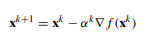

##Definición de la función a minimizar y su gradiente

In [102]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import sympy as sp

In [93]:
def f(x1,x2):
    return ((1-x1)**2)+(100*(x2-x1**2)**2)

In [94]:
def grad(x1,x2): 
    return np.array([-2*(1-x1) -400*x1*(x2-x1**2), 
                     200*(x2-x1**2)])

## Programación de los métodos

### Gradiente desendiente paso optimizado

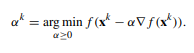

In [55]:
def gd1(x, f, grad, a, max_iter): #Gradiente desendiente paso optimizado
  xs = np.zeros((1 + max_iter, 2))
  xs[0,:] = x

  for i in range(max_iter):
    g = grad(x[0],x[1])
    def phi(s):
      return f(x[0]-s*g[0],x[1]-s*g[1])

    a = optimize.fminbound(phi, 0, 10)

    x = x - a * g
    xs[i+1,:] = x

    tol = abs(f(xs[i+1,0],xs[i+1,1])-f(xs[i,0],xs[i,1]))/max(1,abs(f(xs[i,0],xs[i,1])))
    if tol < epsi:
      break
  return xs,i+1

### Gradiente desendiente paso fijo

In [98]:
def gd2(x, f, grad, a, max_iter, epsi): #Gradiente desendiente paso fijo    
  xs = np.zeros((1 + max_iter, 2))
  xs[0,:] = x

  for i in range(max_iter):
      x = x - a * grad(x[0],x[1])
      xs[i+1,:] = x

      #tolerancia: criterio de finalización
      tol = abs(f(xs[i+1,0],xs[i+1,1])-f(xs[i,0],xs[i,1]))/max(1,abs(f(xs[i,0],xs[i,1])))
      if tol < epsi: #en caso tal de no encontrar un optimo finalizar con el algoritmo
        break
  return xs,i+1

## Solución

### (a) Con gradiente desendiente de paso optimizado

In [95]:
x = np.array([-1,-1])
epsi = 0.001
max_iter = 10000

In [96]:
res1 = gd1(x, f, grad, epsi, max_iter)
xs1 = res1[0]
i1 = res1[1]

-2.0729217175162282 4.303615553703404


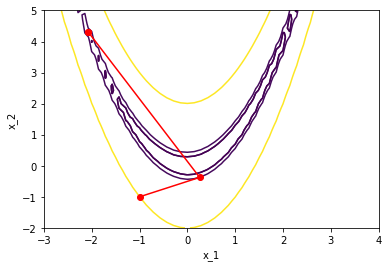

In [97]:
xx = np.linspace(-3, 4)
yy = np.linspace(-2, 5)
X, Y = np.meshgrid(xx, yy)
Z = ((1-X)**2) + (100*(Y-X**2)**2)
function = f(xs1[0:i1+1,0],xs1[0:i1+1,1])
c = plt.contour(X, Y, Z, np.flip(function))
plt.plot(xs1[0:i1+1,0],xs1[0:i1+1,1],'-ro')
plt.xlabel('x_1')
plt.ylabel('x_2')
print(xs1[i1,0],xs1[i1,1])

Text(0, 0.5, 'f(x)')

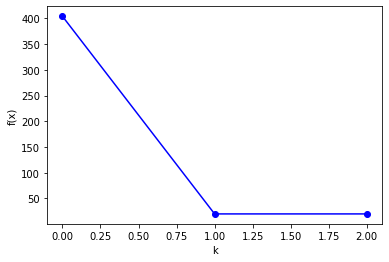

In [52]:
plt.plot(f(xs1[0:i1+1,0],xs1[0:i1+1,1]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')

### (b) Con gradiente desendiente de paso fijo



In [33]:
x = np.array([-1,-1])
max_iter = 1000
epsi = 0.001 #tolerancia
a = 0.25 #tamaño de paso fijo

In [99]:
res2 = gd2(x, f, grad, a, max_iter,epsi)
xs2 = res2[0]
i2 = res2[1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1163: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1163: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:1269: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


nan nan


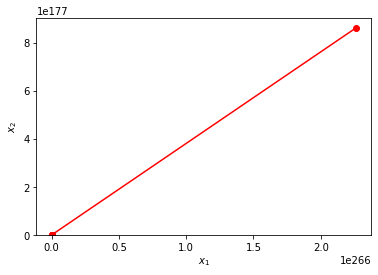

In [100]:
xx = np.linspace(-1, 1.75)
yy = np.linspace(-2, 3.5)
X, Y = np.meshgrid(xx, yy)
Z = ((1-X)**2) + (100*(Y-X**2)**2)
function = f(xs2[0:i2+1,0],xs2[0:i2+1,1])
c = plt.contour(X, Y, Z, np.flip(function))
plt.plot(xs2[0:i2+1,0],xs2[0:i2+1,1] , '-ro')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
print(xs2[i2,0],xs2[i2,1]) #imprimir los valores mínimos encontrados para x1 y x2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  


Text(0, 0.5, 'f(x)')

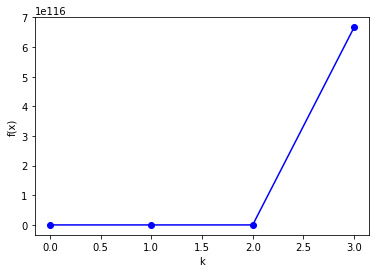

In [101]:
#graficamos los pasos
plt.plot(f(xs2[0:i2+1,0],xs2[0:i2+1,1]),'-bo')
plt.xlabel('k')
plt.ylabel('f(x)')